In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data_df = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 2\data\term-deposit-marketing-2020.csv')

In [3]:
data_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

In [4]:
features = [ 'job',  'marital', 'education', 'default', 'housing', 'loan', 'contact',  'month', 'y']

In [5]:
data_df.age.dtypes

dtype('int64')

In [6]:
list(data_df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'y']

In [4]:
# LL =[]
# char_features = []
# for feat in list(data_df.columns):
#     el = data_df[feat].dtypes
#     LL.append(el)
# LL

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [9]:
data_df.shape

(40000, 14)

In [10]:
data_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [24]:
data_df['y_label'] = data_df.y == 'yes'

data_df['y_label'].to_frame().head()
data_df['y_label'].to_frame().sum()

y_label    2896
dtype: int64

In [25]:
data_df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [26]:
def corr_matrix(df_X):
    df_corrs = df_X.corr()
    upper = df_corrs.where(np.triu(np.ones(df_corrs.shape),k=1).astype(np.bool))

    sns.set(font_scale=15)
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.heatmap(upper,cmap='RdBu',center=0,annot=True);#cmap='Blues' center=0 vmin=-1,vmax=1 cmap='RdBu'

C:\Users\dgarb\AppData\Local\Temp/ipykernel_18148/822198050.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = df_corrs.where(np.triu(np.ones(df_corrs.shape),k=1).astype(np.bool))


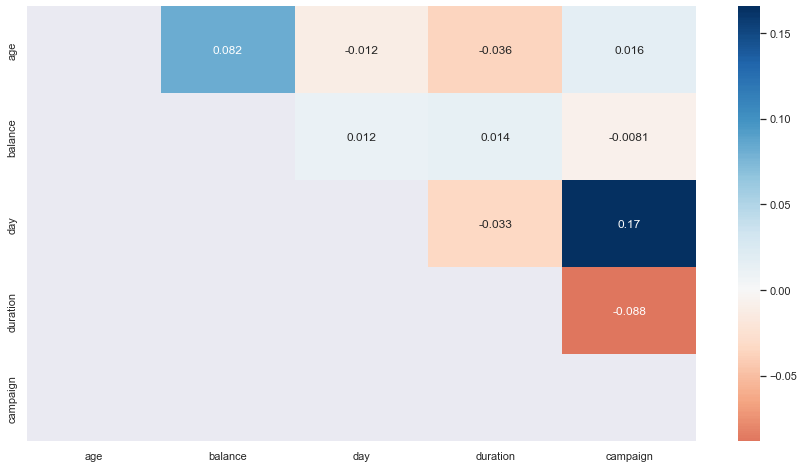

In [27]:
corr_matrix(data_df[['age', 'balance', 'day', 'duration', 'campaign']])

In [28]:
def miss_cols(df):
    missing = np.sum(df.isnull(),axis=0)
    
    miss_ind = np.sum(df.isnull(),axis=0) > 0
    
    vals = pd.Series(filter(lambda x: x != 0,missing))
     
    cols_miss = df.columns[miss_ind]

    L=list(zip(cols_miss,vals, round(vals/df.shape[0],4)))
    
    return sorted(L,reverse=True,key=lambda x: x[2])  

In [29]:
def categ_mean(
    df_name = None,
target_mean = None,
categ_feature = None,
target = None):

    df1 = df_name.groupby([categ_feature])[target].mean().reset_index()
    df1 = df1.rename(columns={target:'mean_of_target'})

    df1['Index'] = round(df1['mean_of_target']/target_mean*100).astype(int)

    df2= df_name[[categ_feature,target]]
    df2 = df2.groupby([categ_feature]).count().reset_index()
    df2 = df2.rename(columns={target:'category_freq'})

    df2['pct_total'] = round(df2['category_freq']/df_name.shape[0]*100,2)

    df3 = pd.merge(df2,df1)
    df3['mean_of_target'] = round(df3['mean_of_target']*100,2)
    
    print(df3)
    print(' ')

    return df3

In [30]:
# def proc_freq(df,variable_):  #Note variable_ must be given in quotes example: variable_ = 'xyz'
#     datax = df[variable_].value_counts().sort_index()
    
#     datay = pd.DataFrame({
#         variable_: datax.index,
#         'Frequency': datax.values,
#         'Percent': ((datax.values/datax.values.sum())*100).round(2),
#         'Cumulative_Frequency': datax.values.cumsum(),
#         'Cumulative_Percent': ((datax.values.cumsum()/datax.values.sum())*100).round(2)   })
    
#     #datay.set_index(variable_)
#     #return(datay.set_index(variable_))
#     return(datay)

In [31]:
def proc_freq2(df,variable_):  #Note variable_ must be given in quotes example: variable_ = 'xyz'
    datax = df[variable_].value_counts().sort_index()
    
    datay = pd.DataFrame({
        variable_: datax.index,
        'Frequency': datax.values,
        'Percent': ((datax.values/datax.values.sum())*100).round(2),
        # 'Cumulative_Frequency': datax.values.cumsum(),
        'Cumulative_Percent': ((datax.values.cumsum()/datax.values.sum())*100).round(2)   })
    
    #datay.set_index(variable_)
    #return(datay.set_index(variable_))
    return(datay)

In [15]:
miss_cols(data_df)

[]

In [16]:
features = [ 'job',  'marital', 'education', 'default', 'housing', 'loan', 'contact',  'month', 'y'] 

for feat in features:
    print(feat)
    print(' ')
    print( proc_freq2(data_df,feat) )
    print(' ')

job
 
              job  Frequency  Percent  Cumulative_Percent
0           admin       4483    11.21               11.21
1     blue-collar       9383    23.46               34.66
2    entrepreneur       1405     3.51               38.18
3       housemaid       1087     2.72               40.89
4      management       8166    20.42               61.31
5         retired       1437     3.59               64.90
6   self-employed       1414     3.54               68.44
7        services       3910     9.78               78.21
8         student        524     1.31               79.52
9      technician       6852    17.13               96.65
10     unemployed       1104     2.76               99.41
11        unknown        235     0.59              100.00
 
marital
 
    marital  Frequency  Percent  Cumulative_Percent
0  divorced       4725    11.81               11.81
1   married      24386    60.96               72.78
2    single      10889    27.22              100.00
 
education
 
   edu

In [23]:
features = [ 'job',  'marital', 'education', 'default', 'housing', 'loan', 'contact',  'month']


### identify string fields and create dummies

In [6]:
df_obj= data_df.select_dtypes(exclude=['int64','float64','bool'])
df_obj.columns
df_obj = df_obj.drop(columns=['y'])

In [9]:
list_of_char_features = list(df_obj.columns)

In [39]:
list_of_char_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month']

In [12]:
df_dummies = pd.get_dummies(df_obj, drop_first=True)

In [13]:
list(df_dummies.columns)

['job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct']

In [14]:
df_dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
data_df[['age', 'balance', 'day', 'duration', 'campaign']].head()

,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1


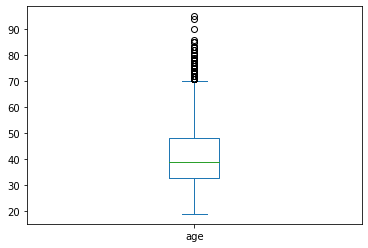

In [16]:
data_df['age'].plot(kind = 'box');

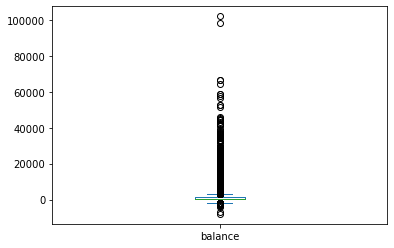

In [17]:
data_df['balance'].plot(kind = 'box');

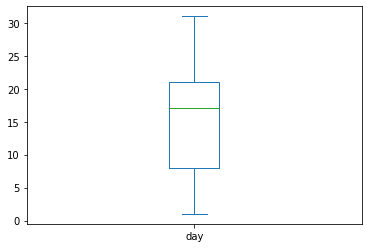

In [18]:
data_df['day'].plot(kind = 'box');

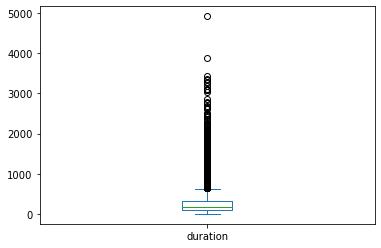

In [19]:
data_df['duration'].plot(kind = 'box');

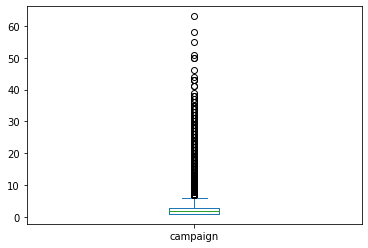

In [20]:

data_df['campaign'].plot(kind = 'box');

In [21]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


### create new df drop y and y_label and add dummies 

In [32]:

combined_df = pd.concat([data_df.drop(columns=['y','y_label']), df_dummies], axis=1)  
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  40000 non-null  int64 
 1   job                  40000 non-null  object
 2   marital              40000 non-null  object
 3   education            40000 non-null  object
 4   default              40000 non-null  object
 5   balance              40000 non-null  int64 
 6   housing              40000 non-null  object
 7   loan                 40000 non-null  object
 8   contact              40000 non-null  object
 9   day                  40000 non-null  int64 
 10  month                40000 non-null  object
 11  duration             40000 non-null  int64 
 12  campaign             40000 non-null  int64 
 13  job_blue-collar      40000 non-null  uint8 
 14  job_entrepreneur     40000 non-null  uint8 
 15  job_housemaid        40000 non-null  uint8 
 16  job_

In [33]:
y_label_series = data_df['y_label'] 

### train test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(
    combined_df, y_label_series, test_size=0.3, stratify=y_label_series, random_state=10)

In [36]:
y_train_dep_df  = y_train_dep.to_frame()

In [37]:
y_test_dep_df =  y_test_dep.to_frame()

### export to csv

In [55]:
# X_train_dep.to_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 2\data\X_train_dep.csv')

In [56]:
# X_test_dep.to_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 2\data\X_test_dep.csv')

In [65]:
# y_train_dep_df.to_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 2\data\y_train_dep_df.csv')

In [66]:
# y_test_dep_df.to_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 2\data\y_test_dep_df.csv')

In [38]:
for feat in list(df_obj.columns):
    categ_mean(
        df_name = data_df,
    target_mean = data_df.y_label.mean() ,
    categ_feature =feat,
    target =  'y_label')

              job  category_freq  pct_total  mean_of_target  Index
0           admin           4483      11.21            7.83    108
1     blue-collar           9383      23.46            5.70     79
2    entrepreneur           1405       3.51            6.26     87
3       housemaid           1087       2.72            4.88     67
4      management           8166      20.42            8.28    114
5         retired           1437       3.59           10.51    145
6   self-employed           1414       3.54            7.92    109
7        services           3910       9.78            6.09     84
8         student            524       1.31           15.65    216
9      technician           6852      17.13            7.25    100
10     unemployed           1104       2.76            8.70    120
11        unknown            235       0.59            7.23    100
 
    marital  category_freq  pct_total  mean_of_target  Index
0  divorced           4725      11.81            8.28    114
1   m

# methods to try